### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy

### **1. Input Data**


$\ f(x) = 2x + 3$
\
$\ Domain :  -20 \leq x \leq 20$
\
해당 그래프를 파란색 선으로 그린다.
\
Gaussian Normal Distribution : mu=0, sigma=5 인 y점들을 random하게 샘플링한다
\
target_y : Linear Model
\
y : Random Point

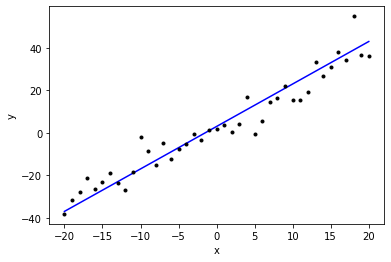

In [5]:
x = np.linspace(-20,20,41)
#print(x)
target_y = copy.deepcopy(x)
for i in range(0, 41):
  target_y[i] = 2 * target_y[i] + 3
#print(y)

y = copy.deepcopy(target_y)
#print(y)
n = np.random.normal(0,5,41)
#print(n)
y = np.add(y,n)
#print(y)

fig = plt.figure()

graph1 = plt.plot(x, target_y, 'b')
plt.xlabel('x')
plt.ylabel('target_y')

graph2 = plt.plot(x, y, '.k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### **2. Linear Model**
h(x) = mx + b
\
Objective Function
\
cost = 1/2m * SUM((h(x)-y)^2)

In [0]:
def ObjectiveFunction(m, b):
  #print(m)
  cost = 0
  for x in range(-20, 21):
    h = m * x + b
    r = y[x+20]
    cost += np.square(h - r) / (2*m)
    #print(cost)
  return cost

In [0]:
def gradientDescent(m, b):
  for x in range(-20, 21):
    h = m * x + b
    r = y[x+20]
    lr = 0.01
    b -= lr / m * np.square(h-r)
    m -= lr / m * (np.square(h-r) * x)
  return b, m 

In [0]:
def main():
  m = 3
  b = 3

  l = ObjectiveFunction(3, 3)
  b, m = gradientDescent(3, 3)
  print(l)
  print(b)
  print(m)

In [57]:
if __name__ == "__main__":
  main()

1555.3429307916906
1.4661089976443503e+23
2.934826957279816e+24
